# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Study/MDS_UTexas/1_PythonFoundations/week5_Project1_FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
#return last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# print number of rows and columns in the dataset
print("In the dataset we have: \nrows\t:",df.shape[0],'\ncolumns\t:',df.shape[1])
print(df.shape)

In the dataset we have: 
rows	: 1898 
columns	: 9
(1898, 9)


#### **Observations:**
There are 1898 rows and 9 columns present in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# print information about the structure and datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**
We have in total 4 Integer columns, 4 Object(strings) and 1 float64 column.



*   As per the above output, at first glance we can see that there are no missing values since rowcount=Non-Null Count, nonetheless we have already seen in the first 5 records and last 5 records, a value 'Not given' in the rating field which will be analyzed afterwards.
*   The fields order_id and customer_id have been recognized as int64. It would be better to have them as object(string) since we will not do any math/calculations with them; nonetheless is still fine as they are for now.
*   The rating field has been detected as object(string) due to string values found as per the first bullet point. That field must be ideally numerical; later on the field will be converted to numerical **accordingly**

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
from pandas.core.reshape.merge import groupby
#checking null values in the dataset
print('Number of null/nan values per column:\n',df.isnull().sum())
#checking unique values
print('\n\nunique values for rating field are --> ',df['rating'].unique(),'\n')
#getting a count for each one of the unique values
df.groupby(['rating'])[['order_id']].count()

NameError: ignored

#### **Observations:**
*   At first glance by using the isnull() method we can see that there are no emply/missing values, nonetheless by observing carefully the output in the table of question 2 we can see that only 1 of the columns doesn't have the right data type(**rating**)
*  **rating** is the only field with missing values. As per the verifications I can observe 736 rows with rating value = 'Not given'

In [ ]:
#replacing value of rating field by 'nan' for row where values is 'Not given'
df['rating']=df['rating'].replace(['Not given'],np.nan)

#pringint number of na/nan values in the field rating which match the original value or record that had 'Not given'
print('There are ',df['rating'].isna().sum(),' na/nan values in column rating\n')

#getting a count per each one of the unique values. nan values are not shown in the count
print(df.groupby(['rating'])[['order_id']].count())

#converting ratint type to a numeric data type
df['rating']=df['rating'].astype(float)
df.info()

There are  736  na/nan values in column rating

        order_id
rating          
3            188
4            386
5            588
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### **Observations:**
All 'Not given' values for the rating field have been replaced by nan; then field has been converted to numeric. The change can be appreciated in the last output where rating is now a float64. For now the missing values will be left as nan.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# show statistical information for each field
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### **Observations:** 

I will describe all fields stats main highlights, nonetheless the answer to the main question is in the food_preparation_time field comments.

*   **No observations for order_id and customer_id** fields since they are unique identifier of orders and customers respectively, so calculations are meant to be done on those fields.
*   **cost_of_the_order:** in average we have a cost of 16.5. The median is 14.14, slightly smaller than the mean which might indicate a right skewed distribution. Min and max values are 4.47 and 35.4 respectively.
*   **rating:** on average the orders have been rated with 4.34. We have a mean of 5 which is the top rating indicating that more than 50% of the data has been rated with 5 
*   **food_preparation_time:** `the minimum time to prepare the food is 20 minutes, average of 23 minutes and a maximum time is 35 mins. Since the mean and the median values are quite close, this might suggest a normal symetric distribution.
*   **delivery_time:** the average delivery time is 24.16 minutes, while the median is 25 which might suggest a normal distribution slightly left skewed
*  At first glance there seems to be no outliers in the data.







### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#pringint number of not rated('Not given') orders!
print('There are ',df['rating'].isna().sum(),' na/nan values in column rating')

There are  736  na/nan values in column rating


#### Observations:
Not rated orders had initially the value 'Not given' in the field rating. Those values were previously replaced by nan. The total number of not rated *orders* is **736**

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**order_id**

In [ ]:
#check uniqueness of OrderID field. We are expecting the account of records is equal to the count of unique Orders
print('unique orders is: ',df['order_id'].nunique(),' | rows count is',df.shape[0])

unique orders is:  1898  | rows count is 1898


**Observations of order_id:**
We can see that the total number of records is equal to the count of unique orders which is the expected outcome


**customer_id**

In [ ]:
#Checking number of unique customers. Since a customer can place more than one order we are expecting this count to be less than the total count of orders/observations
print('We can see in total ',df['customer_id'].nunique(),' customers')

We can see in total  1200  customers


**Observations of customer_id:**
We have a total of 1200 customers which means that we have customers with more than 1 order


**restaurant_name**

In [ ]:
#getting count of unique restaurants
print('In total we have ',df['restaurant_name'].nunique(),' unique restaurants\n\n')

#getting info for restaurants, calculating % contribution wise
df_restaurants=df.groupby(['restaurant_name'])[['order_id']].count().sort_values('order_id', ascending=False).reset_index()
df_restaurants['% of orders']=(df_restaurants['order_id'] / df['order_id'].count())*100

#getting list of top5 and bottom 5
print('Now we will get top 5 and bottom 5')
display(df_restaurants)

#getting list of top5 restaurants
print('\n\nGetting the top 10 restaurants')
display(df_restaurants.head(10))

#restaurants with only 1 order
print('\n\nRestaurants with a single order are in total ',df_restaurants[df_restaurants['order_id']==1].count()[0])

In total we have  178  unique restaurants


Now we will get top 5 and bottom 5


,restaurant_name,order_id,% of orders
0,Shake Shack,219,11.538
1,The Meatball Shop,132,6.955
2,Blue Ribbon Sushi,119,6.270
3,Blue Ribbon Fried Chicken,96,5.058
4,Parm,68,3.583
...,...,...,...
173,Klong,1,0.053
174,Kambi Ramen House,1,0.053
175,Il Bambino,1,0.053
176,Hunan Manor,1,0.053




Getting the top 10 restaurants


,restaurant_name,order_id,% of orders
0,Shake Shack,219,11.538
1,The Meatball Shop,132,6.955
2,Blue Ribbon Sushi,119,6.270
3,Blue Ribbon Fried Chicken,96,5.058
4,Parm,68,3.583
5,RedFarm Broadway,59,3.109
6,RedFarm Hudson,55,2.898
7,TAO,49,2.582
8,Han Dynasty,46,2.424
9,Blue Ribbon Sushi Bar & Grill,44,2.318




Restaurants with a single order are in total  50


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


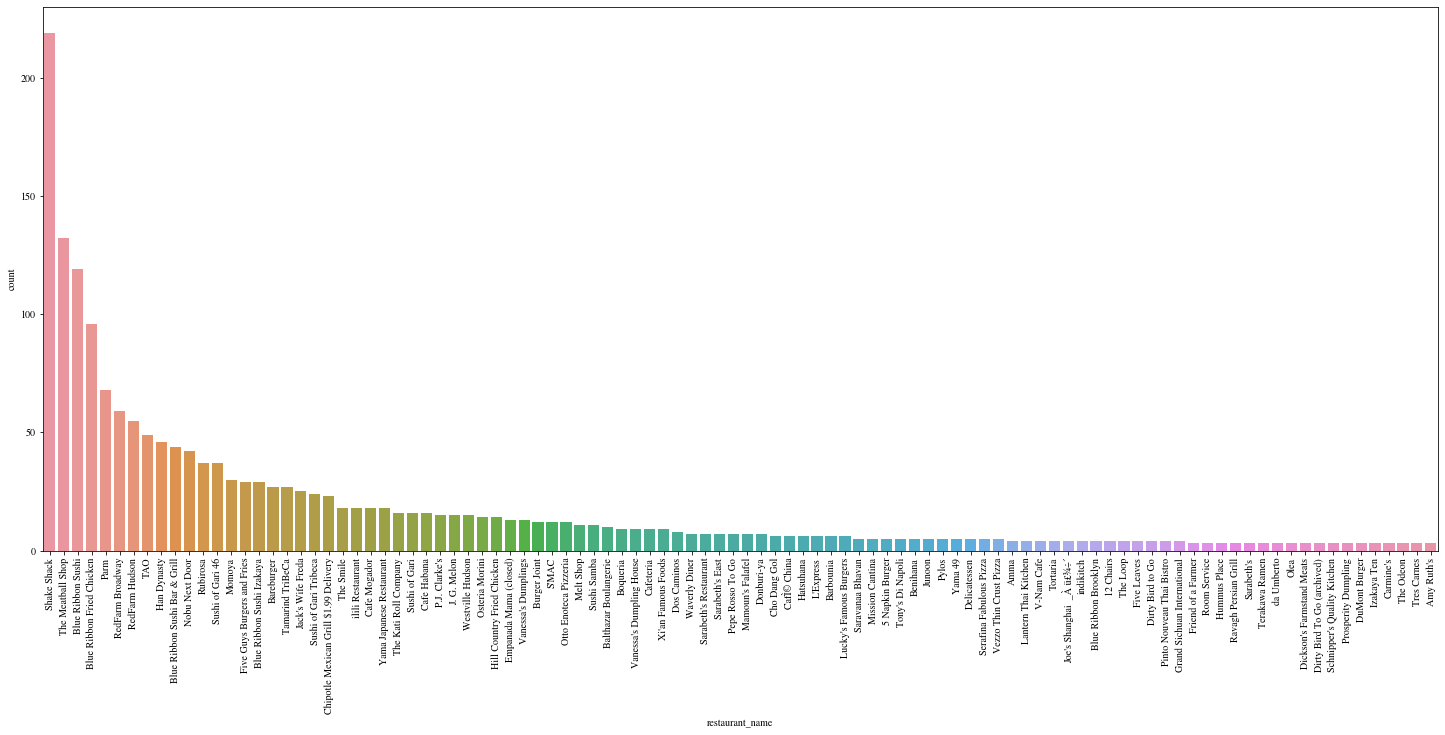

In [ ]:
#ploting countplot for restaurant name showing only top10(showing more chart doen't look good)
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='restaurant_name', order=df.restaurant_name.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations of restaurant_name:**
*   We have a total of 178 different restaurants
*   The top 5 restaurants is Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm
*   The top 10 resturants cover about 47% of all the orders.
*   There are 50 restaurants with only 1 order

**cuisine_type**

In [ ]:
#getting total number of different cuisines
print('In total we have ',df['cuisine_type'].nunique(),' different types of cuisines\n')
#getting count of orders by cuisine
df_cuisinetype=df.groupby('cuisine_type').count()['order_id'].reset_index().sort_values('order_id', ascending=False)
#df_cuisinetype.columns=['cuisine_type','numberOfOrders'] #renaming columns
#getting contribution by cuisine
df_cuisinetype['% contrib']=(df_cuisinetype['numberOfOrders']/df_cuisinetype['numberOfOrders'].sum())*100

display(df_cuisinetype)

In total we have  14  different types of cuisines



,cuisine_type,numberOfOrders,% contrib
0,American,584,30.769
5,Japanese,470,24.763
4,Italian,298,15.701
1,Chinese,215,11.328
8,Mexican,77,4.057
3,Indian,73,3.846
9,Middle Eastern,49,2.582
7,Mediterranean,46,2.424
12,Thai,19,1.001
2,French,18,0.948


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

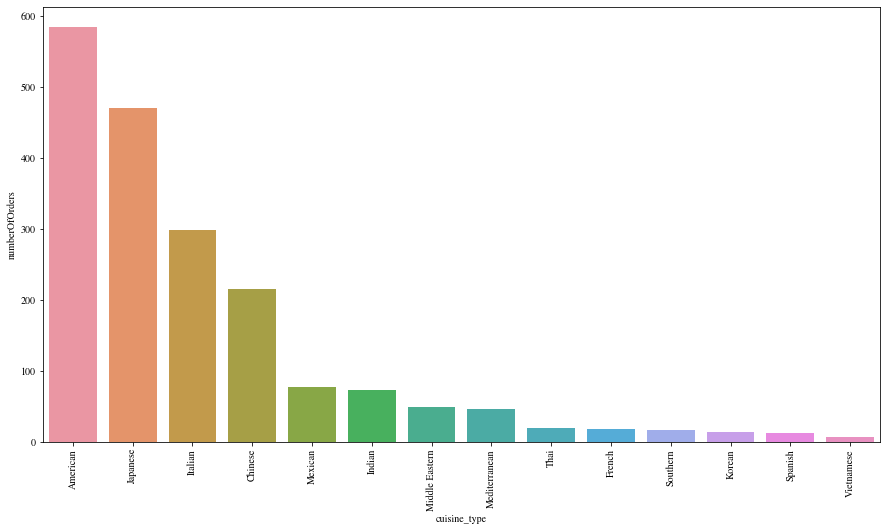

In [ ]:
#ploting barplot of number of orders by cuisine type
plt.figure(figsize=(15,8));
sns.barplot(data=df_cuisinetype,x='cuisine_type',y='numberOfOrders')
plt.xticks(rotation=90)

**Observations of cuisine_type:**
*   We have a total of 14 different types of cuisine
*   The top 2 (American and Japanese) cover about 55% of all orders.
*   Thai, French, Southern, Korean, Spanish and Vietnamese have less than 20 orders each one



**cost_of_the_order**

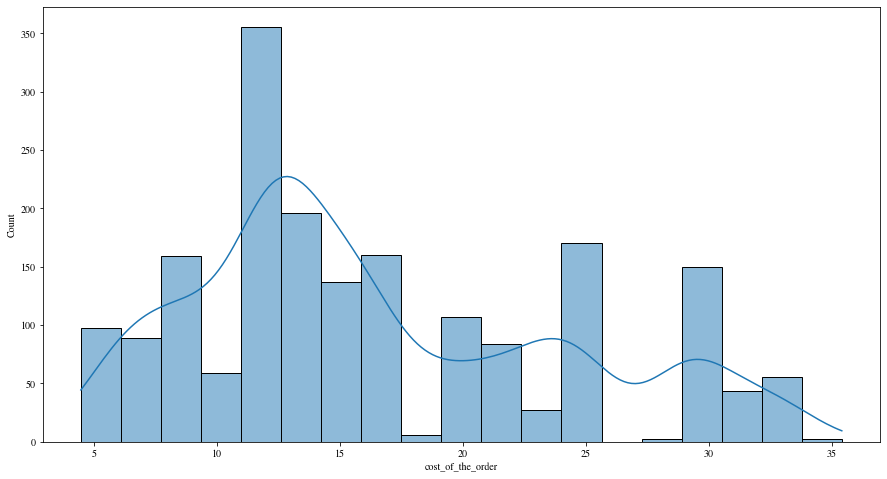

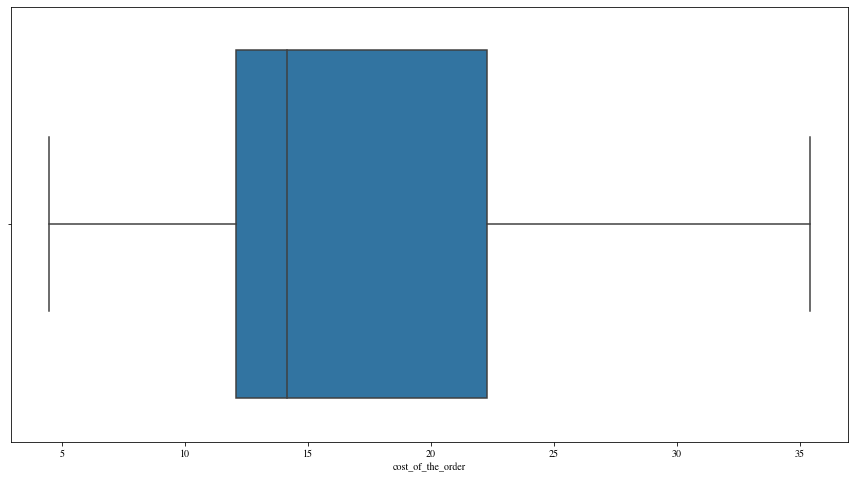

<Figure size 1080x576 with 0 Axes>

In [ ]:
#ploting a histogram with density curve for cost_of_the_order
plt.figure(figsize=(15,8));
sns.histplot(data=df, x='cost_of_the_order', kde=True);
plt.show();

#ploting a boxplot for cost_of_the_order
plt.figure(figsize=(15,8));
sns.boxplot(data=df, x='cost_of_the_order');
plt.show();
plt.figure(figsize=(15,8));

**Observations of cost_of_the_order:**
*   For the variable cost_of_the_order we have a right skewed distribution. The density curve show us that it is a multimodal distribution.
*   As per the boxplot I cannot observe potential outliers.
*   cost has a min value close to 4, a max value close to 35 and a median value close to 14.



**day_of_the_week**

,day_of_the_week,orders_count,% contrib
0,Weekday,547,0.288
1,Weekend,1351,0.712


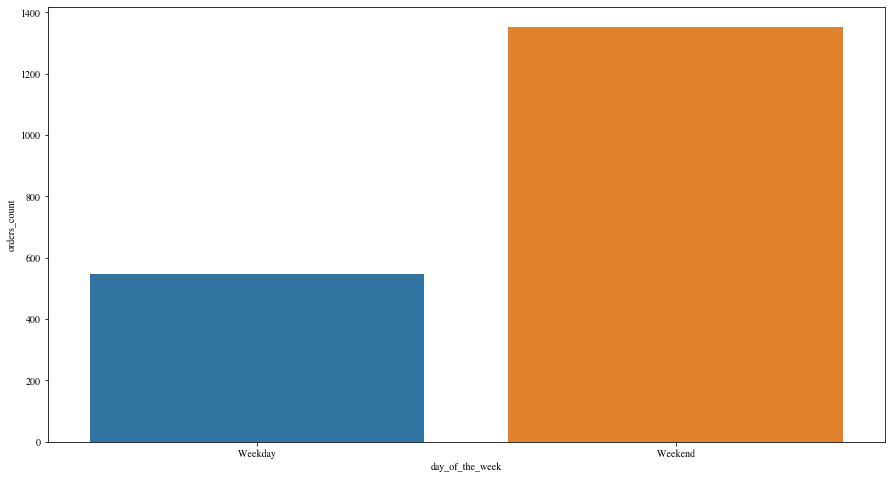

In [ ]:
#creating a dataframe for day_of_the_week info
df_dayOfTheWeek=df.groupby(['day_of_the_week']).count()['order_id'].reset_index()
#renaming columns of new dataframe
df_dayOfTheWeek.columns=['day_of_the_week','orders_count']
#getting % contribution per day of the week
df_dayOfTheWeek['% contrib']=df_dayOfTheWeek['orders_count']/df_dayOfTheWeek['orders_count'].sum()
display(df_dayOfTheWeek)
print('\n\n')
plt.figure(figsize=(15,8));
sns.barplot(data=df_dayOfTheWeek, x='day_of_the_week',y='orders_count')
plt.show();

**Observations of day_of_the_week:**
*   We 2 different values for this variable Weekday and Weekend
*   29% of the orders are placed during Weekdays; while the rest 71% is placed over the weekends.

**rating**


getting records count by rating including not rated records


,rating,orders_count,% contrib
0,NaN,736,0.388
1,5.000,588,0.310
2,4.000,386,0.203
3,3.000,188,0.099





getting records count by rating NOT including not rated records


,rating,orders_count,% contrib
0,5.000,588,0.506
1,4.000,386,0.332
2,3.000,188,0.162


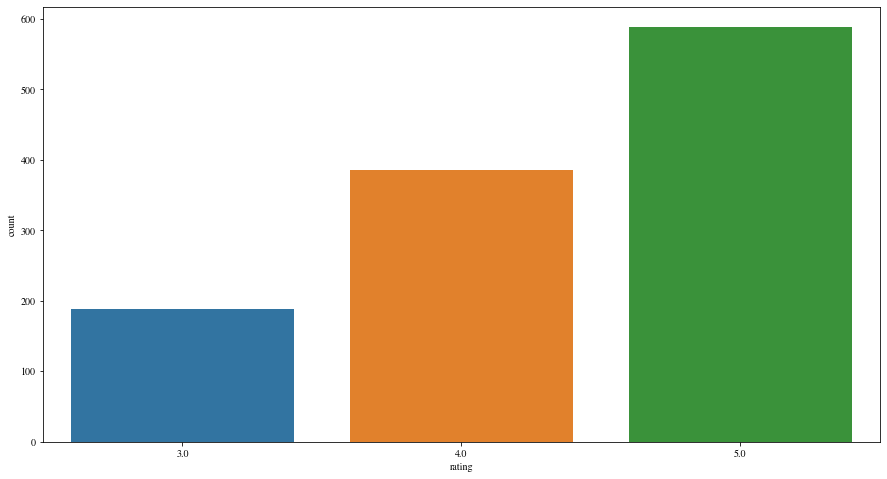

<Figure size 1080x576 with 0 Axes>

In [ ]:
#getting count of records by rating
print('\ngetting records count by rating including not rated records')
df_rating_na=df['rating'].value_counts(dropna=False).reset_index()
df_rating_na.columns=['rating','orders_count']
df_rating_na['% contrib']=df_rating_na['orders_count']/df_rating_na['orders_count'].sum()
display(df_rating_na)
print('\n\n')

print('getting records count by rating NOT including not rated records')
df_rating=df['rating'].value_counts().reset_index()
df_rating.columns=['rating','orders_count']
df_rating['% contrib']=df_rating['orders_count']/df_rating['orders_count'].sum()
display(df_rating)
print('\n\n')

#ploting a countplot for rating
plt.figure(figsize=(15,8));
sns.countplot(data=df, x='rating');
plt.show();
plt.figure(figsize=(15,8));

**Observations of rating:**
*   rating is a ordinal categorical variable with values from 1 to 5, that is why countplot was used to analyze it
*   39% or the orders were not rated.
*   Only values 3, 4 and 5 can be observed with 31%, 20% and 10% respectively when not rated records are included.
*   51%, 33% and 16% are the contribution for rating 3,4 and 5 respectively when not rated records are excluded

**food_preparation_time**

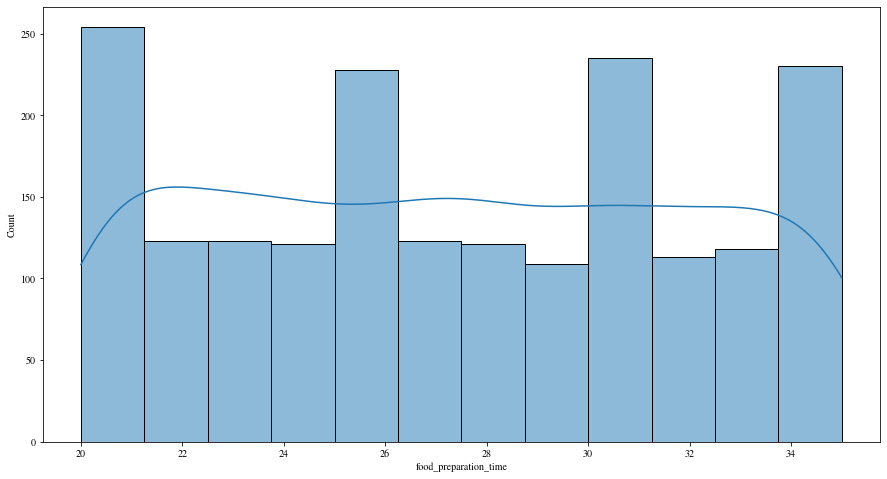

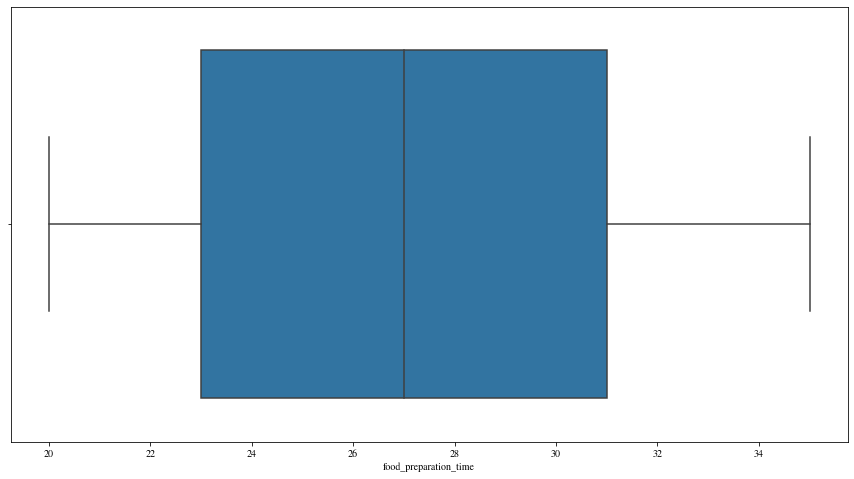

<Figure size 1080x576 with 0 Axes>

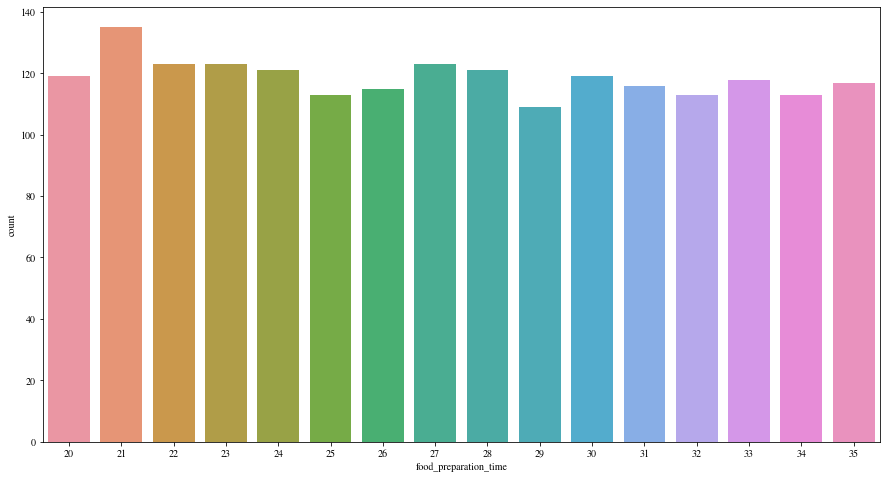

<Figure size 1080x576 with 0 Axes>

In [ ]:
#ploting a histogram with density curve for cost_of_the_order
plt.figure(figsize=(15,8));
sns.histplot(data=df, x='food_preparation_time', kde=True);
plt.show();

#ploting a boxplot for cost_of_the_order
plt.figure(figsize=(15,8));
sns.boxplot(data=df, x='food_preparation_time');
plt.show();
plt.figure(figsize=(15,8));

#ploting a countplot for cost_of_the_order
plt.figure(figsize=(15,8));
sns.countplot(data=df, x='food_preparation_time');
plt.show();
plt.figure(figsize=(15,8));

**Observations of food_preparation_time:**
*   No skewness observed. Variable seems to be multimodal with a uniform distribution.
*   As per the boxplot no outliers are observed.
*   It has a min value close to 20, a max value close to 35 and a median value close to 27.


**delivery_time**

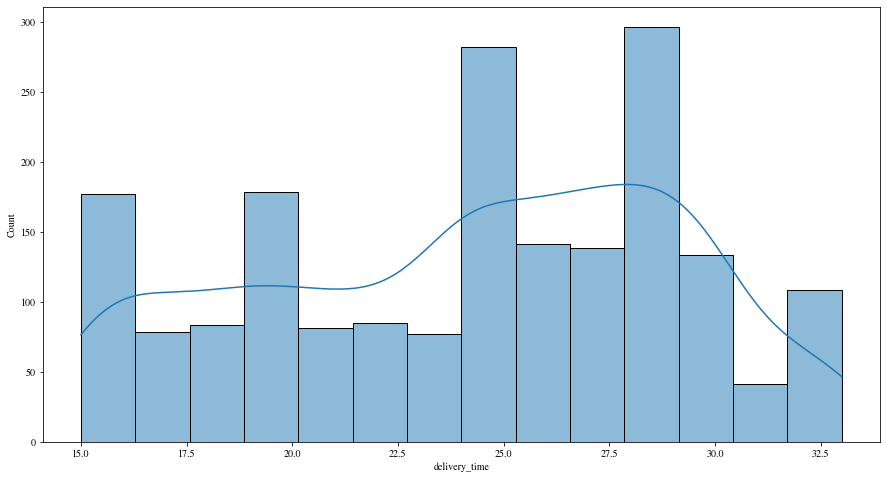

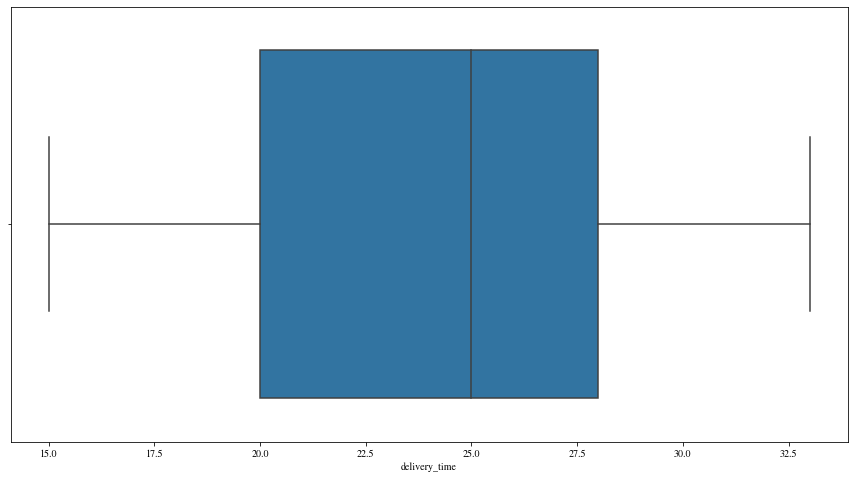

<Figure size 1080x576 with 0 Axes>

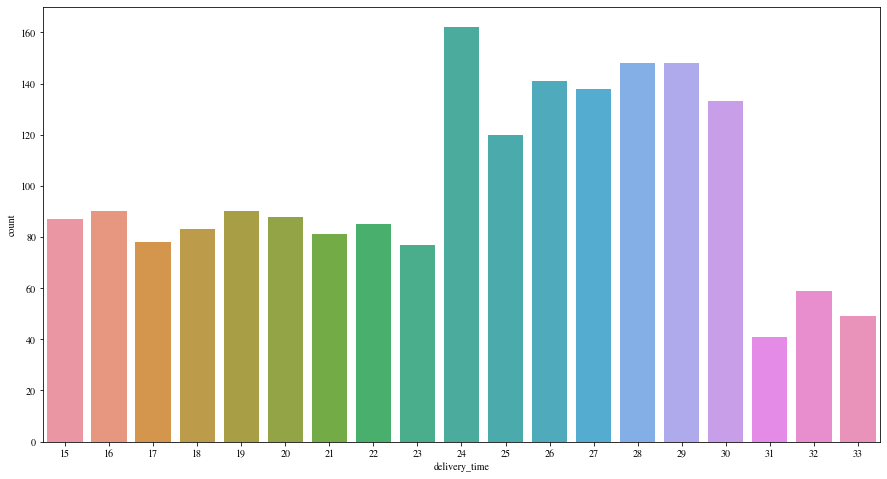

<Figure size 1080x576 with 0 Axes>

In [ ]:
#ploting a histogram with density curve for cost_of_the_order
plt.figure(figsize=(15,8));
sns.histplot(data=df, x='delivery_time', kde=True);
plt.show();

#ploting a boxplot for cost_of_the_order
plt.figure(figsize=(15,8));
sns.boxplot(data=df, x='delivery_time');
plt.show();
plt.figure(figsize=(15,8));

#ploting a countplot for cost_of_the_order
plt.figure(figsize=(15,8));
sns.countplot(data=df, x='delivery_time');
plt.show();
plt.figure(figsize=(15,8));

**Observations of delivery_time:**
*   Variable seems to be uniform multimodal with a left skewed distribution.
*   As per the boxplot no outliers are observed.
*   It has a min value of 15, a max value of 33 and a median value of 25.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Getting the top 5 restaurants by number of orders received
df.groupby(['restaurant_name'])[['order_id']].count().sort_values('order_id', ascending=False).reset_index().head(5)

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### **Observations:**
The top 5 restaurants is Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#creating a dataframe with Weekend records
df_weekend=df[df['day_of_the_week']=='Weekend']
#getting the top1 cuisine with more orders
df_weekend.groupby(['cuisine_type','day_of_the_week']).count()['order_id'].reset_index().sort_values('order_id', ascending=False).head(1)

,cuisine_type,day_of_the_week,order_id
0,American,Weekend,415


#### **Observations:**
The most popular cuisine on weekends is **American cuisine** with 415 orders in total!!

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Adding a boolean column for order>20
df['>20']=df['cost_of_the_order']>20
# getting and printing the % or orders >20
orders_greater20=df['>20'].sum()/df['order_id'].count()*100
print('Percentage of orders > 20 is ',"{:.2f}".format(orders_greater20),'%')

Percentage of orders > 20 is  29.24 %


#### **Observations:**
The percentaje of orders > 20 is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# getting the mean of delivery_time
print('Average delivery time is ',"{:.2f}".format(df['delivery_time'].mean()),' minutes')

Average delivery time is  24.16  minutes


#### **Observations:**
The average delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# getting top 3 customers with more orders
df.groupby(['customer_id']).count()['order_id'].reset_index().sort_values('order_id', ascending=False).head(3)

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9


#### **Observations:**
The 3 customers that will get the 20% discount vouchers(3 customers with more orders) are customer_id 116 with 13 orders, 84 with 10 orders and 333 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


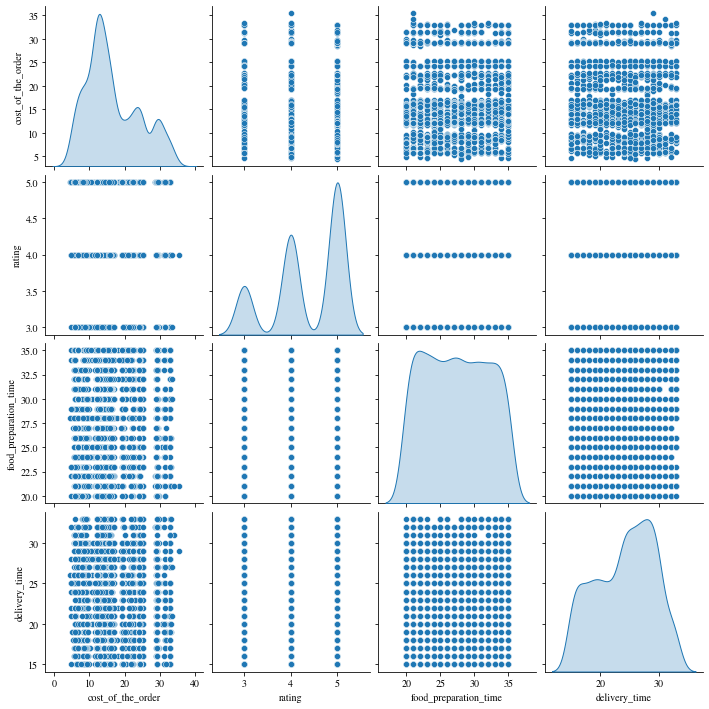

In [ ]:
# getting dataframe with numeric only variables
df_numeric=df[['cost_of_the_order','rating','food_preparation_time','delivery_time']]
#ploting pairplot to check correlation between numerical variables
sns.pairplot(data=df_numeric,diag_kind="kde")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


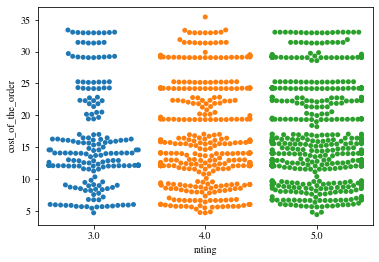

In [ ]:
sns.swarmplot(data=df_numeric, x='rating',y='cost_of_the_order');

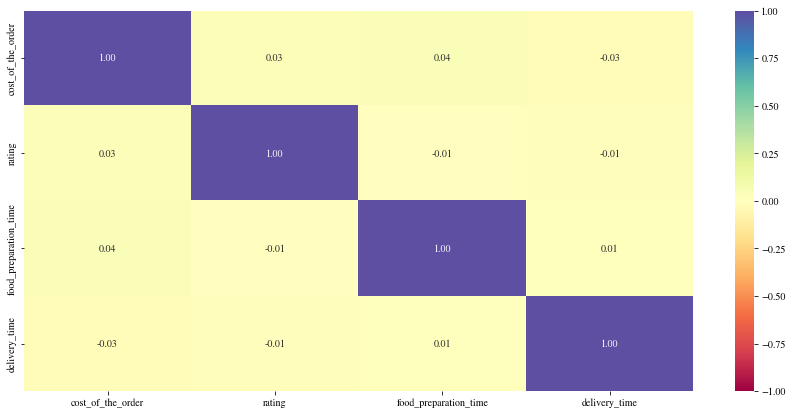

In [ ]:
#getting correlation matrix
corr = df_numeric.corr()
# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<Figure size 1440x720 with 0 Axes>

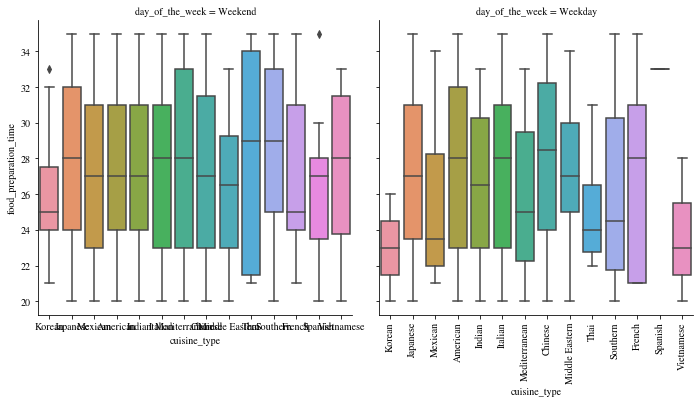

<Figure size 3600x720 with 0 Axes>

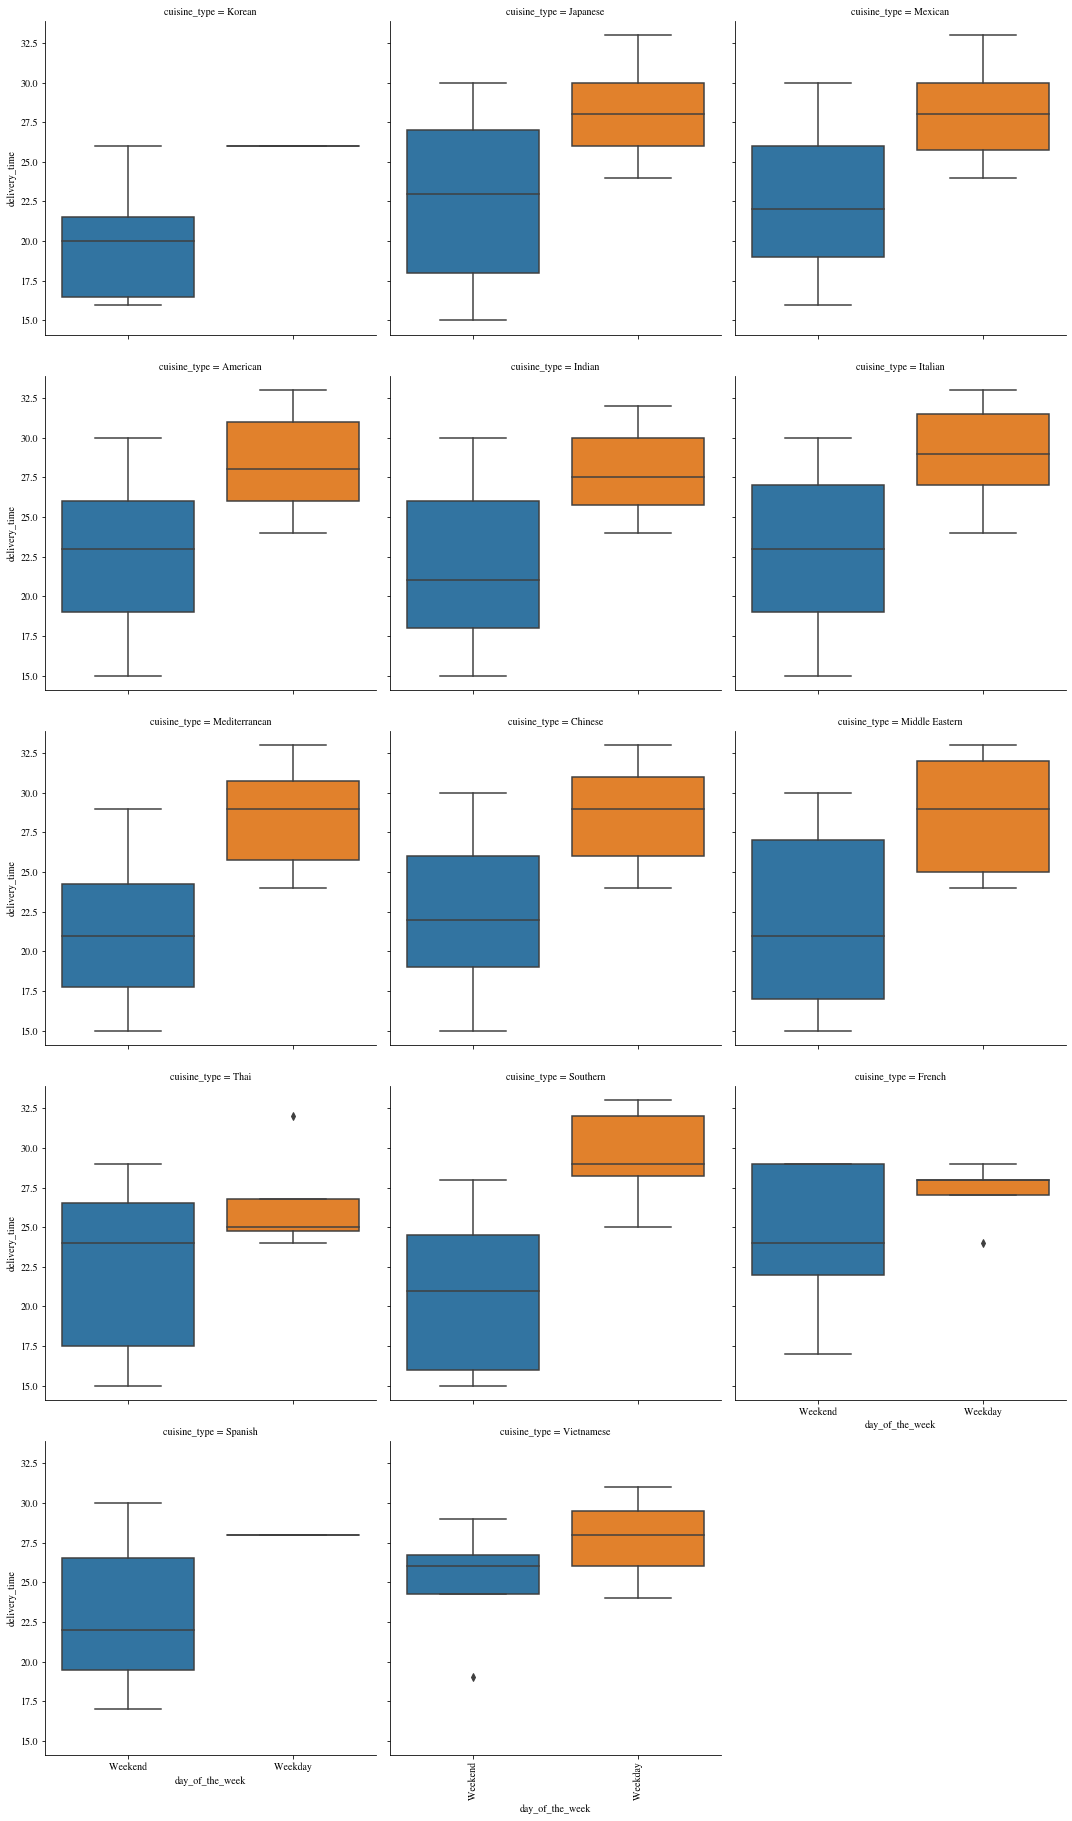

<Figure size 3600x720 with 0 Axes>

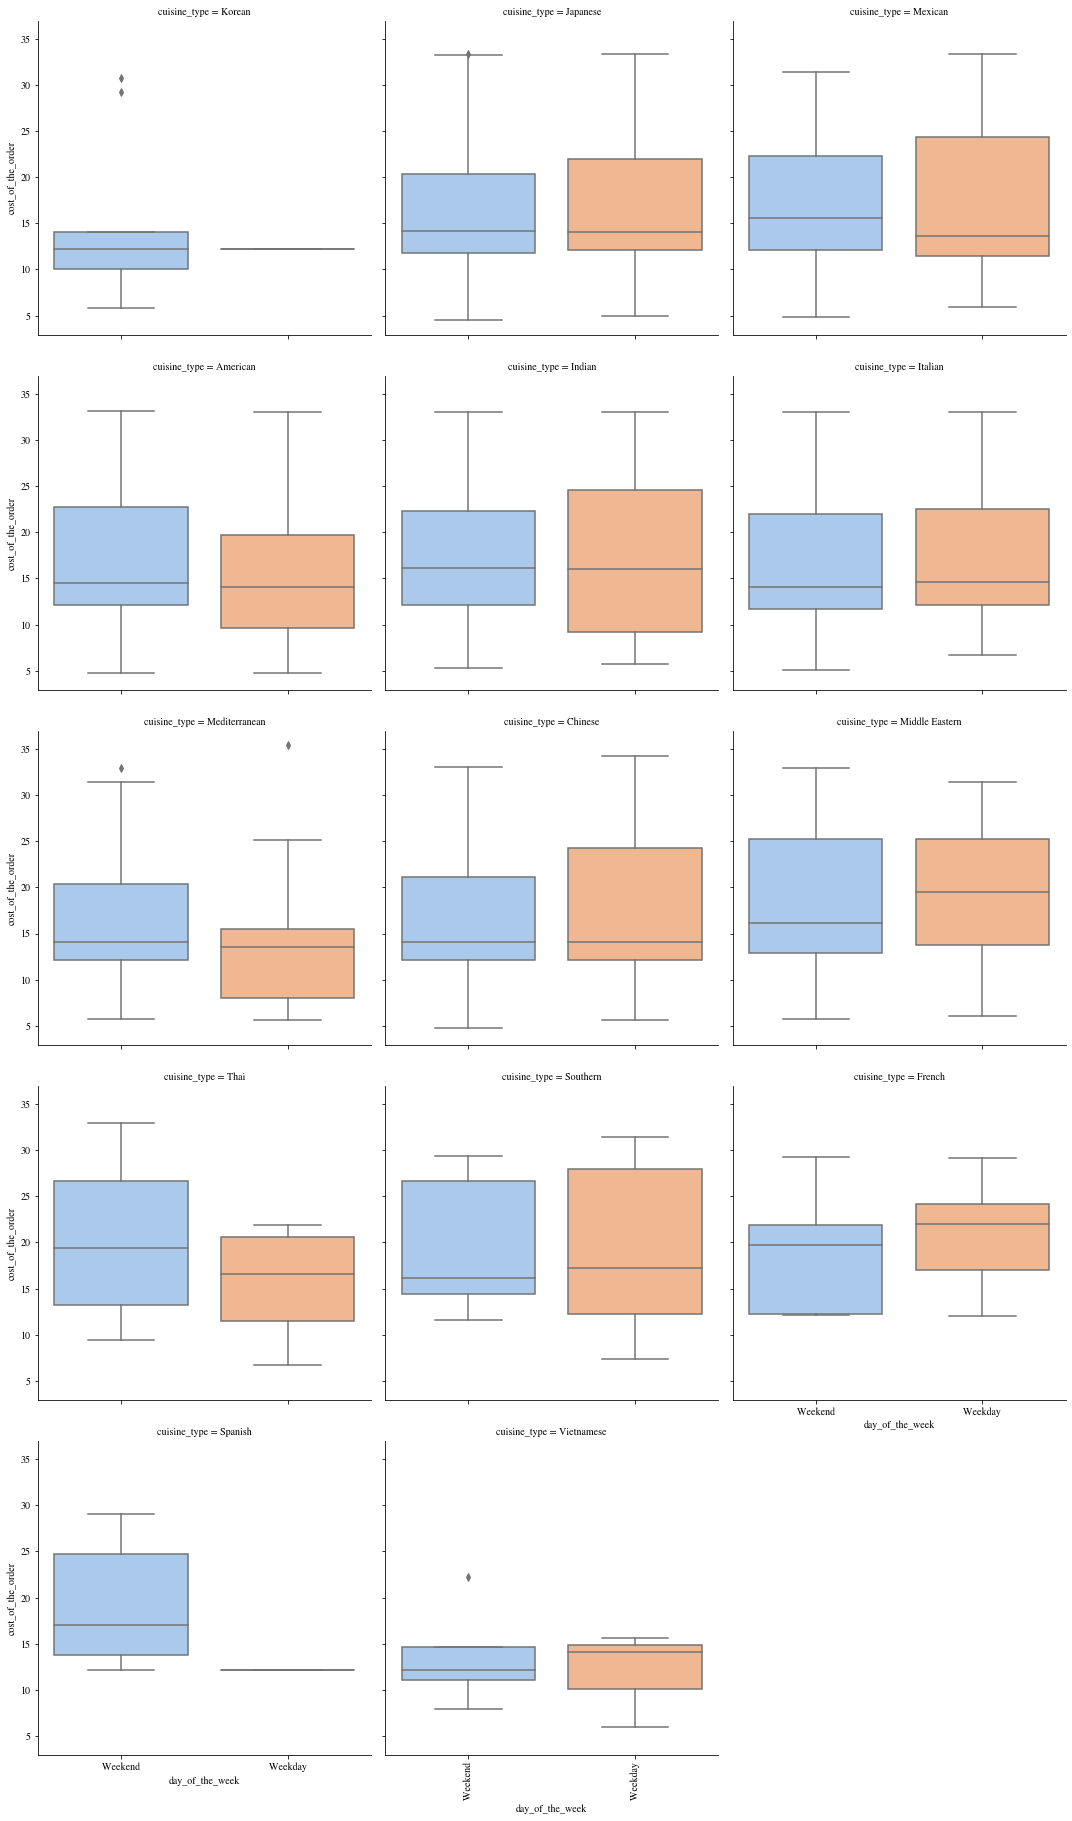

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,x= 'cuisine_type', y='food_preparation_time', kind='box',col='day_of_the_week')
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(50,10))
sns.catplot(data=df,x= 'day_of_the_week', y='delivery_time', kind='box',col='cuisine_type', col_wrap=3)
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(50,10))
sns.catplot(data=df,x= 'day_of_the_week', y='cost_of_the_order', kind='box',col='cuisine_type', col_wrap=3,palette='pastel')

plt.xticks(rotation=90);
plt.show()

#### **Observations:**
*   There doesn't seems to be any correlation between the numerical variables cost_of_the_order, rating, food_preparation_time,delivery_time 
*   Doesn't seem to be relationship between categorical variables and numerical variables

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# getting a new dataframe with count and mean for rating by restaurant name
df_promotion=df.groupby(['restaurant_name'])['rating'].aggregate(['count','mean']).reset_index().sort_values('count', ascending=False)
#getting the list of the restaurants fulfilling the criteria
df_promotion.loc[(df_promotion['count']>50) & (df_promotion['mean']>4),['restaurant_name','count','mean']]

,restaurant_name,count,mean
136,Shake Shack,133,4.278
153,The Meatball Shop,84,4.512
21,Blue Ribbon Sushi,73,4.219
20,Blue Ribbon Fried Chicken,64,4.328


#### **Observations:**
The restaurants that fulfill the criteria are 4.
*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#orders <=5 should not be included
df_g5=df[df['cost_of_the_order']>5]
#getting records with cost >5 and <=20 and then getting total amount of order
commision15=df_g5[df_g5['cost_of_the_order']<=20]
com15pct=commision15['cost_of_the_order'].sum()
#getting records with cost >20 and then getting total amount of order
commision25=df_g5[df_g5['cost_of_the_order']>20]
com25pct=commision25['cost_of_the_order'].sum()
# Getting commision calculation
revenue=com15pct*0.15+com25pct*0.25
revenue

6166.303

#### Observations:
Total revenue is 6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#computing total delivery time preparation+delivery
df['total_dtime']=df['food_preparation_time']+df['delivery_time']
#creating new dataframe with records with total delivery time>60
totalmore60=df[df['total_dtime']>60]
print('The pct of food that takes more than 60 minutes to be delivered is ',"{:.2f}".format((totalmore60['order_id'].count()/df['order_id'].count())*100),'%')

The pct of food that takes more than 60 minutes to be delivered is  10.54 %


#### Observations:
The percetage of orders that takes more than 60 minutes to be delivered is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<Figure size 1440x720 with 0 Axes>

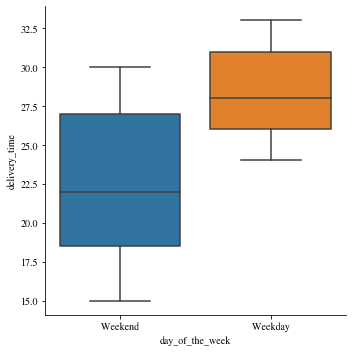

<Figure size 1080x576 with 0 Axes>

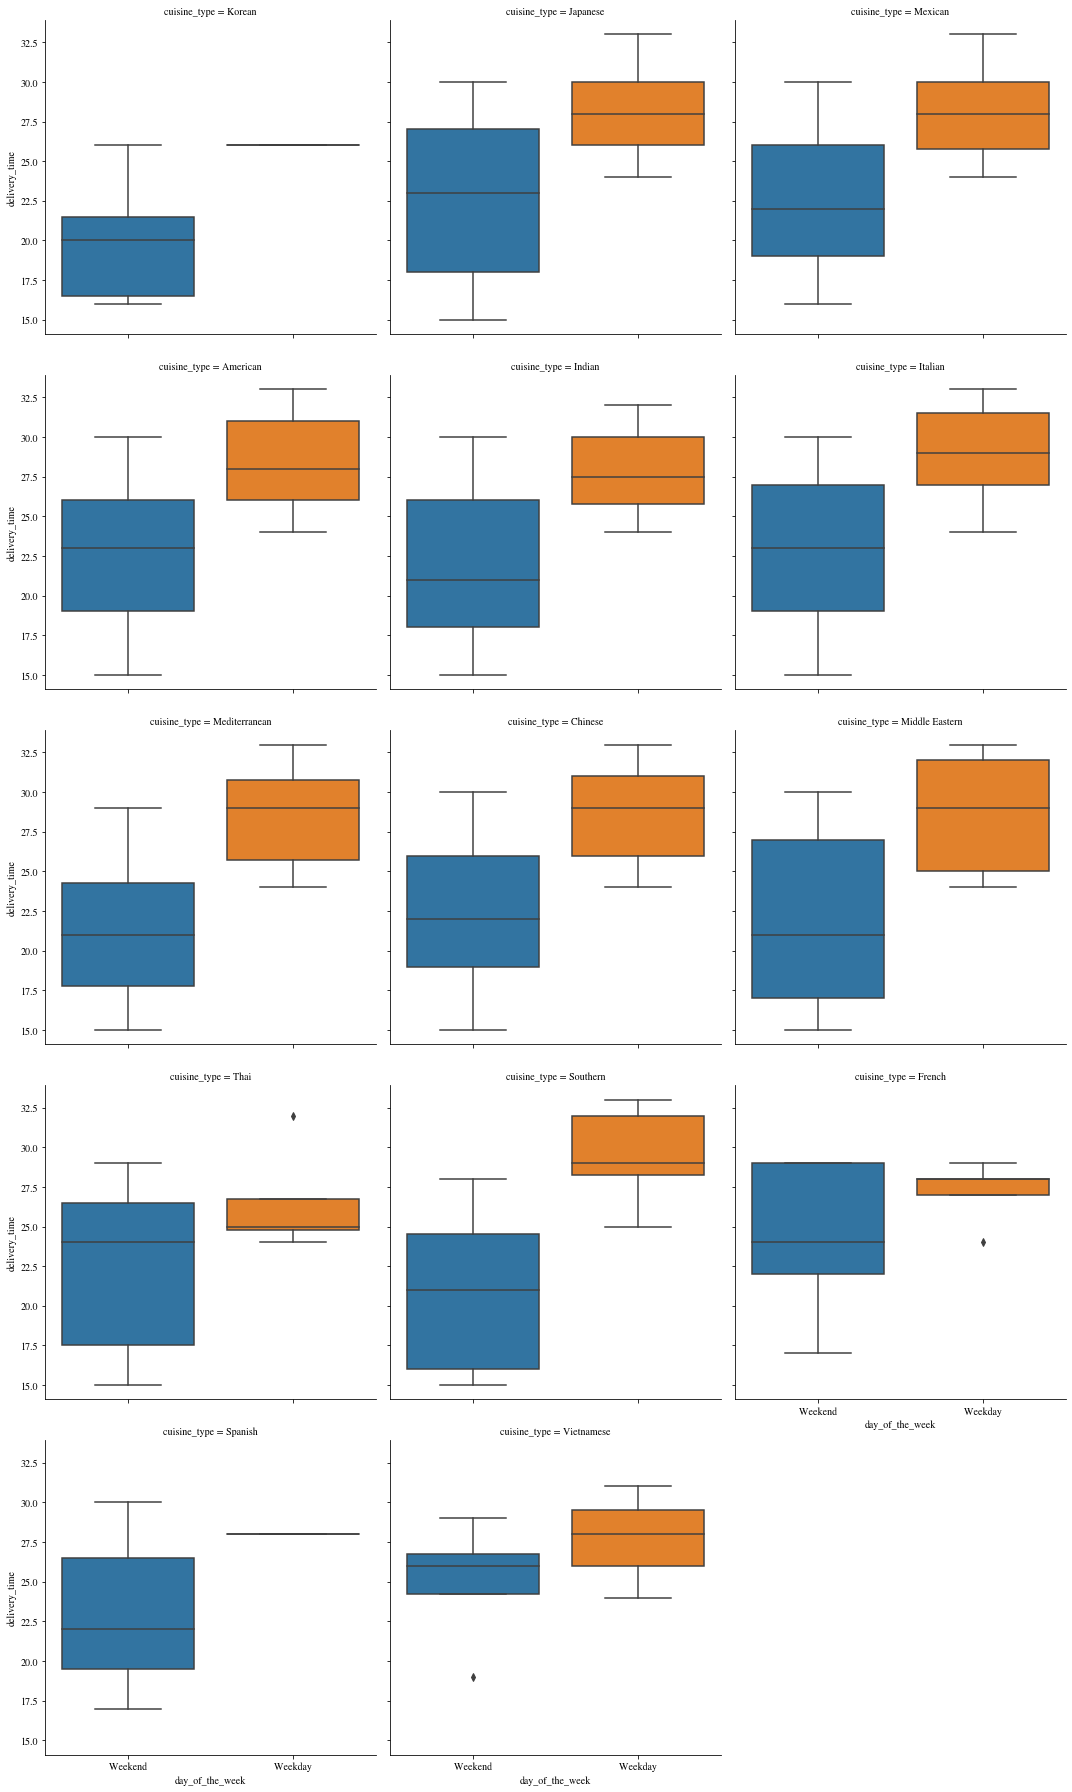

In [ ]:
#ploting a catplot/boxplot for delivery_time
plt.figure(figsize=(20,10));
sns.catplot(data=df, x='day_of_the_week',y='delivery_time', kind='box');
plt.show();

#ploting a catplot/boxplot for delivery_time
plt.figure(figsize=(15,8));
sns.catplot(data=df, x='day_of_the_week',y='delivery_time', kind='box',col='cuisine_type',col_wrap=3);
plt.show();

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---